## Warmups

In [1]:
# Warmup 0: Recall how to read in and use json data

import json
# we are going to learn about this today !
from collections import namedtuple

# Deserialize
def read_json(path):
    with open(path, encoding="utf-8") as f: # f is a variable 
        return json.load(f)                 # f represents a reference the JSON file
    
# Serialize
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

kiva_dict = read_json('kiva.json')
loan_list = kiva_dict['data']['lend']['loans']['values'] # this gives us a list of dicts
loan_list[0].keys()

dict_keys(['name', 'description', 'loanAmount', 'geocode'])

In [3]:
# Warmup 1a: What is the total amount needed to fund all of the loans
total = 0
for loan in kiva_dict['data']['lend']['loans']['values']:
    total += float(loan['loanAmount'])
print(total)

4350.0


In [5]:
# Warmup 1b: What are the unique countries of origin in alphabetical order?
countries = []
for loan in kiva_dict['data']['lend']['loans']['values']:
    countries.append(loan['geocode']['country']['name'])
countries=list(set(countries))
countries.sort()
print(countries)

['Albania', 'Kenya', 'Tajikistan', 'Togo']


In [ ]:
# Warmup 2: Explain what the code below does
x = 1

# This creates a variable x which refers to the immutable integer value 1

In [ ]:
# Warmup 2b: Explain what the code below does
shelf = ["sugar", "coffee"]

# This creates a variable shelf which refers to the mutable list ["sugar", "coffee"]

# Objects, Tuples, and NamedTuples

## Reading

- [Downey Ch 10 ("Objects and Values" and "Aliasing") and Ch 12](https://greenteapress.com/thinkpython2/html/thinkpython2011.html)
- [Python for Everybody, 11.1 - 11.7](https://runestone.academy/ns/books/published/py4e-int/tuples/toctree.html)

## Learning Objectives
After this lecture you will be able to...
- Explain the difference between objects vs references, and stack vs heap.
- Determine the side effects that occur when modifying parameters.
- Use tuples to store immutable sequences of values.
- Use namedtuple (immutable) to store user-defined data objects.


### Objects vs References & Stack vs Heap

The following lines assign two variables a value:

```python
a = 'banana'
b = 'banana'
```

You know that `a` and `b` both refer to a string, but do they refer **to the same string?**  There are two possibilities:
1. `a` and `b` refer to two different stirngs that have the same value.
2. `a` and `b` refer to the same string.

To check if two variables refer to the same object, you can use the `is` operator:

```python
a is b
```
```
True
```

Now try doing the same thing but with two lists:

```python
a = [1,2,3]
b = [1,2,3]
a is b
```
```
False
```

### You Try It

In the cell below, try creating the two variables, `a` and `b`, and assign them values from the types you have learned, then check if they are refering to the same object?

In [7]:
# Check if two variables refer to the same object

a = {1:"hello",2:"goodbye"}
b = {1:"hello",2:"goodbye"}
c = a

print(a is b)
print(a is c)

False
True



- **Variables hold references to objects (i.e. memory addresses).**
- **Variables are created on the Stack, objects are created on the Heap.**

You can see the memory address a variable is holding by using the `id()` function.  In PythonTutor and most visualizers, instead of showing the memory address a reference is drawn as a pointer to the data.

```python
x = 'hello'
print(id(x))
print(x)
```
```
125741132448080
hello
```

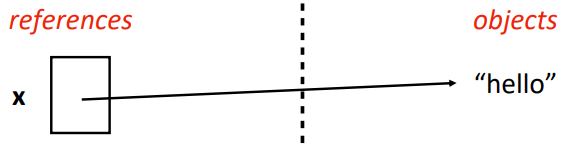


This is important when working with **mutable objects**.  Look at the code in the cell below and predict what will be printed, then run the code and see if it printed what you thought.  Then open the code in [Python Tutor](https://pythontutor.com/render.html#code=x%20%3D%20%5B1,2,3%5D%0Ay%20%3D%20%5B1,2,3%5D%0Az%20%3D%20x%0A%0Ax.append%284%29%0Ay.append%284%29%0Az.append%284%29%0A%0Aprint%28x%29%0Aprint%28y%29%0Aprint%28z%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false) and run the code to visualize what is going on.


In [8]:
x = [1,2,3]
y = [1,2,3]
z = x

x.append(4)
y.append(4)
z.append(4)

print(x)
print(y)
print(z)

[1, 2, 3, 4, 4]
[1, 2, 3, 4]
[1, 2, 3, 4, 4]


This becomes especially important when **calling functions** and passing values.  An implicit assignment is occuring between the argument to a function and the parameter in the function.  Visualize the running of this code in [Python Tutor](https://pythontutor.com/render.html#code=x%20%3D%20%5B1,2,3%5D%0A%0Adef%20f%28g%29%3A%0A%20%20%20%20g.append%284%29%0A%0Af%28x%29%0Aprint%28x%29&cumulative=false&curInstr=7&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false).

```python
x= [1,2,3]

def f(g):
   g.append(4)

f(x)
print(x)
```
```
[1,2,3,4]
```

### Determine the side effects that occur when modifying parameters.


Example 1a [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28x%29%3A%0A%20%20%20%20x%20*%3D%203%0A%20%20%20%20print%28%22f%3A%22,%20x%29%0A%0Anum%20%3D%2010%0Aprint%28%22before%3A%22,%20num%29%0Af%28num%29%0Aprint%28%22after%3A%22,%20num%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [9]:
def f(x):
    x *= 3
    print("f:", x)

num = 10
print("before:", num)
f(num)
print("after:", num)

# Takeaway: What happens when a parameter is reassigned in a function?

before: 10
f: 30
after: 10


Example 1b, [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28items%29%3A%0A%20%20%20%20items.append%28%22donuts%22%29%0A%20%20%20%20print%28%22f%3A%22,%20items%29%0A%0Awords%20%3D%20%5B'sugar',%20'coffee'%5D%0Aprint%28%22before%3A%22,%20words%29%0Af%28words%29%0Aprint%28%22after%3A%22,%20words%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [10]:
def f(items):
    items.append("donuts")
    print("f:", items)

words = ['sugar', 'coffee']
print("before:", words)
f(words)
print("after:", words)

# Takeaway: What happens when a list parameter is mutated in a function?

before: ['sugar', 'coffee']
f: ['sugar', 'coffee', 'donuts']
after: ['sugar', 'coffee', 'donuts']


Example 1c [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28items%29%3A%0A%20%20%20%20items%20%3D%20items%20%2B%20%5B%22donuts%22%5D%0A%20%20%20%20print%28%22f%3A%22,%20items%29%0A%0Awords%20%3D%20%5B'sugar',%20'coffee'%5D%0Aprint%28%22before%3A%22,%20words%29%0Af%28words%29%0Aprint%28%22after%3A%22,%20words%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [11]:
def f(items):
    items = items + ["donuts"]
    print("f:", items)

words = ['sugar', 'coffee']
print("before:", words)
f(words)
print("after:", words)

# Takeaway: What happens when a list parameter is reassigned?

before: ['sugar', 'coffee']
f: ['sugar', 'coffee', 'donuts']
after: ['sugar', 'coffee']


Example 1d [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20first%28items%29%3A%0A%20%20%20%20return%20items%5B0%5D%0A%0Adef%20smallest%28items%29%3A%0A%20%20%20%20items.sort%28%29%0A%20%20%20%20return%20items%5B0%5D%0A%0Anumbers%20%3D%20%5B4,5,3,2,1%5D%0Aprint%28%22first%3A%22,%20first%28numbers%29%29%0Aprint%28%22smallest%3A%22,%20smallest%28numbers%29%29%0Aprint%28%22first%3A%22,%20first%28numbers%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [12]:
def first(items):
    return items[0]

def smallest(items):
    items.sort()
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

# Takeaway: What happens when a list parameter is sorted "in place" using .sort() ?

first: 4
smallest: 1
first: 1


Example 1e [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20first%28items%29%3A%0A%20%20%20%20return%20items%5B0%5D%0A%0Adef%20smallest%28items%29%3A%0A%20%20%20%20items%20%3D%20sorted%28items%29%0A%20%20%20%20return%20items%5B0%5D%0A%0Anumbers%20%3D%20%5B4,5,3,2,1%5D%0Aprint%28%22first%3A%22,%20first%28numbers%29%29%0Aprint%28%22smallest%3A%22,%20smallest%28numbers%29%29%0Aprint%28%22first%3A%22,%20first%28numbers%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [13]:
def first(items):
    return items[0]

def smallest(items):
    items = sorted(items)
    return items[0]

numbers = [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

# Takeaway: What happens when a list parameter is sorted using sorted()? 

first: 4
smallest: 1
first: 4


In [ ]:
# What can we say about the last two examples?
# sort() mutates the list; sorted does not mutate the list, it returns a new list.

In [ ]:
# Write one good thing about lists being mutable:
# We can change (mutate) them in functions!

In [ ]:
# Write one bad thing about lists being mutable:
# We can change (mutate) them in functions!

## Your Turn!

Explain how the below code works.

In [14]:
def add_vacation_plan(itinerary, location, plan):
    if location not in itinerary:
        itinerary[location] = []
    itinerary[location].append(plan)
    
def get_vacation_plans(itinerary, location):
    if location not in itinerary:
        return []
    return itinerary[location]
    
alices_vacay = {}
bobs_vacay = {}

add_vacation_plan(alices_vacay, "Malibu", "Swimming")
add_vacation_plan(alices_vacay, "San Diego", "Touring")
add_vacation_plan(alices_vacay, "San Diego", "Shopping")

add_vacation_plan(bobs_vacay, "Madison", "Studying")
add_vacation_plan(bobs_vacay, "HWY 151", "Driving")
add_vacation_plan(bobs_vacay, "Devils Lake", "Swimming")
add_vacation_plan(bobs_vacay, "Devils Lake", "Kayaking")
add_vacation_plan(bobs_vacay, "Devils Lake", "Hiking")

print(alices_vacay)
print(bobs_vacay)
print(get_vacation_plans(alices_vacay, 'San Diego'))
print(get_vacation_plans(bobs_vacay, 'Seattle'))

{'Malibu': ['Swimming'], 'San Diego': ['Touring', 'Shopping']}
{'Madison': ['Studying'], 'HWY 151': ['Driving'], 'Devils Lake': ['Swimming', 'Kayaking', 'Hiking']}
['Touring', 'Shopping']
[]


### Use tuples to store immutable sequences of values.

**Tuples** are like lists but they are **immutable**.  You create a tuple using parentheses instead of square brackets:

```python

x = (1,2,3)  # creates an immutable tuple
y = [1,2,3]  # creates a mutable list
```

In [15]:

# practice with tuples
scores = [32, 55, 72, 91]   # a list is mutable
coordinates = (-3, 4, 7)    # a tuple is not mutable

In [17]:
# show that scores is mutable
scores[-1] = 100
print(scores)

# show that tuples are immutable
coordinates[-1] = 100.   #tuple not mutable
print(coordinates)

[32, 55, 72, 100]


TypeError: 'tuple' object does not support item assignment

In [18]:
coordinates = (5, 77, -3)   # However, re-assignment is OK
print(coordinates)

(5, 77, -3)


In [19]:
scores_tuple = tuple(scores) # you can convert a list into a tuple
print(scores_tuple)

(32, 55, 72, 100)


In [22]:
# Question:  Can tuples be sorted?
# Yes, kind of. You can use sorted:
print(sorted(scores_tuple))
scores_tuple.sort()

[32, 55, 72, 100]


AttributeError: 'tuple' object has no attribute 'sort'

In [ ]:
# reference:  https://www.w3schools.com/python/python_tuples.asp

In [23]:

# Why use tuples? 
#     keys in dictionaries must be immutable types
#     some data never changes : GPS coordinates

# Fails with TypeError -- can't use a mutable object as the key
buildings = {
    [0,0]: "Comp Sci",
    [0,2]: "Psychology",
    [4,0]: "Noland",
    [1,8]: "Van Vleck" }

TypeError: unhashable type: 'list'

In [24]:
# Works with tuple as keys
buildings = {
    (0,0): "Comp Sci",
    (0,2): "Psychology",
    (4,0): "Noland",
    (1,8): "Van Vleck" }

# find the name of the building at coordinate (4,0)
print(buildings[(4,0)])

Noland


### 21.3 Use namedtuple (immutable) to store user-defined data objects.
- namedtuple is useful for creating well-defined immutable objects
- namedtuple is like a mix of tuples and dictionaries

First import the data type then create a specific type of namedtuple:

```python
from collections import namedtuple
Person = namedtuple("Person", ['first','last','age'])
```

This creates a `Person` type which must have the fields `first`, `last`, and `age`.  Then you can create objects of this new type:

```python
louis = Person('Louis','Oliphant',53)
addie = Person('Addie','Johnson',20)
```

You can access the fields using dot notation or indexes:

```python
print(louis.last)
print(louis[1])
```
```
Oliphant
Oliphant
```



### You Try It

Use the `Person` namedtuple to create a list of friends and family in the `people` variable.

In [26]:
from collections import namedtuple

people = []

# A namedtuple is like its own kind of type!
# its a Python convention to use a Capital letter when naming a namedtuple
# define a namedtuple called Person
Person = namedtuple("Person", ["fname", "lname", "age"])

# append at least three Persons to the people list
people.append(Person("Louis","Oliphant",53))
people.append(Person("Becky","Brown",53))
people.append(Person("Sam","Luna-Nelson",25))

# Now lets print out their information
for p in people:
    print("{} {} - age: {}".format(p.fname,p.lname,p.age))


Louis Oliphant - age: 53
Becky Brown - age: 53
Sam Luna-Nelson - age: 25


In [28]:
# make a list of Persons
people=[
    Person("Alice", "Anderson", 30),  # positional arguments
    Person("Bob", "Baker", 31),
    # add two more Persons to people
    Person("Celia", "Answer", 21),
    Person("Marcus", "Carlson", 33)
    
]

# Print the first person's full name.
print(people[0].fname,people[0].lname)

Alice Anderson


In [29]:
# Print out everyone's name!
for p in people:
    print(p.fname,p.lname)

Alice Anderson
Bob Baker
Celia Answer
Marcus Carlson


Namedtuples have a deeper significance....the namedtuples we create are their own type

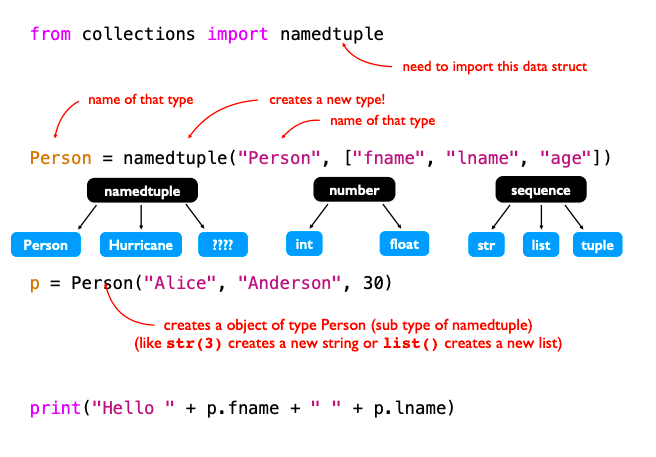

In [32]:
# Write a function to find the average age of the Persons in people

def avg_age(p_list):
    total = 0.0
    # assume p_list is a list of Persons
    for p in p_list:
        total += p.age
    return total/len(p_list)

avg_age(people)

28.75

## Summary

We have talked about variables holding **references**, which is very important when the object it is referring to is mutable.  We have talked about two new immutable data types: **tuples** and **namedtuples**.  The **namedtuples** allows you to create your own types.